In [25]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
from PIL import Image

# Đường dẫn gốc của bộ dataset
dataset_dir = '/kaggle/input/cows-detection-dataset'  

# 1. Khám phá folder images/
images_dir = os.path.join(dataset_dir, 'images')
image_files = glob.glob(os.path.join(images_dir, '*'))

print(f" IMAGES:")
print(f"- Tổng số ảnh: {len(image_files)}")
if len(image_files) > 0:
    print(f"- Các định dạng ảnh: {set([os.path.splitext(f)[-1] for f in image_files])}")
    # Xem kích thước ảnh đầu tiên
    img = Image.open(image_files[0])
    print(f"- Kích thước ảnh đầu tiên: {img.size} (width x height)")


# 2. Khám phá folder boxes/
# Đường dẫn tới folder boxes
boxes_dir = '/kaggle/input/cows-detection-dataset/boxes'

# Lấy tất cả file ảnh trong boxes
box_image_files = glob.glob(os.path.join(boxes_dir, '*'))
box_image_files = [f for f in box_image_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

print(f"📦 Boxes folder:")
print(f"- Tổng số file ảnh trong boxes/: {len(box_image_files)}")

if len(box_image_files) > 0:
    # Liệt kê định dạng file
    extensions = set([os.path.splitext(f)[-1] for f in box_image_files])
    print(f"- Các định dạng file: {extensions}")
    
    # Đọc kích thước một ảnh mẫu
    with Image.open(box_image_files[0]) as img:
        width, height = img.size
    print(f"- Kích thước ảnh đầu tiên: {width} x {height} (width x height)")
    
    # (Tuỳ chọn) Đọc hết kích thước tất cả ảnh
    all_sizes = []
    for file in box_image_files:
        with Image.open(file) as img:
            all_sizes.append(img.size)
    
    # Thống kê kích thước trung bình
    widths, heights = zip(*all_sizes)
    avg_width = sum(widths) / len(widths)
    avg_height = sum(heights) / len(heights)
    print(f"- Kích thước trung bình của ảnh: {avg_width:.1f} x {avg_height:.1f}")

# 3. Khám phá file annotations.xml
xml_file = os.path.join(dataset_dir, 'annotations.xml')
if os.path.exists(xml_file):
    print(f" Annotations.xml:")
    tree = ET.parse(xml_file)
    root = tree.getroot()
    print(f"- Root tag: {root.tag}")
    # In ra 3 phần tử đầu tiên
    print("- Các phần tử đầu tiên:")
    for elem in list(root)[:3]:
        print(f"  - {elem.tag} with attributes {elem.attrib}")
else:
    print("Không tìm thấy file annotations.xml.")


# 4. Khám phá file cows.csv
csv_file = os.path.join(dataset_dir, 'cows.csv')
if os.path.exists(csv_file):
    print(f" Cows.csv:")
    df = pd.read_csv(csv_file)
    print(f"- Số dòng dữ liệu: {df.shape[0]}")
    print(f"- Số cột: {df.shape[1]}")
    print(f"- Các cột: {list(df.columns)}")
    print("- 5 dòng đầu tiên:")
    print(df.head())
else:
    print("Không tìm thấy file cows.csv.")

 IMAGES:
- Tổng số ảnh: 51
- Các định dạng ảnh: {'.jpeg', '.png'}
- Kích thước ảnh đầu tiên: (1008, 756) (width x height)
📦 Boxes folder:
- Tổng số file ảnh trong boxes/: 51
- Các định dạng file: {'.png'}
- Kích thước ảnh đầu tiên: 1008 x 756 (width x height)
- Kích thước trung bình của ảnh: 1515.6 x 1016.3
 Annotations.xml:
- Root tag: annotations
- Các phần tử đầu tiên:
  - version with attributes {}
  - meta with attributes {}
  - image with attributes {'id': '0', 'name': 'images/0.png', 'width': '900', 'height': '599'}
 Cows.csv:
- Số dòng dữ liệu: 51
- Số cột: 2
- Các cột: ['image_id', 'image_name']
- 5 dòng đầu tiên:
   image_id    image_name
0         0  images/0.png
1         1  images/1.png
2         2  images/2.png
3         3  images/3.png
4         4  images/4.png


📋 5 dòng đầu tiên của dữ liệu nhãn:
  Image ID     Image Name  Width  Height  Number of Cows
0        0   images/0.png    900     599              17
1        1   images/1.png   2000    1497              13
2       10  images/10.png   1280     853              12
3       11  images/11.png   2560    1707              36
4       14  images/14.png    864     648              31

 Tổng số ảnh: 51
Tổng số bò trong toàn bộ dataset: 1031
Số bò trung bình trên mỗi ảnh: 20.22


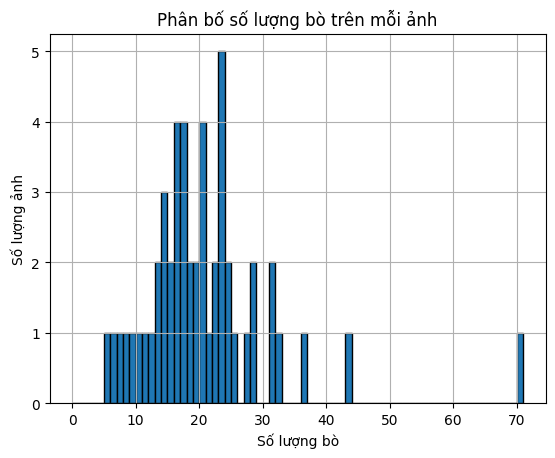

In [26]:
import os
import xml.etree.ElementTree as ET
import pandas as pd

# Đường dẫn tới file annotations.xml
xml_file = '/kaggle/input/cows-detection-dataset/annotations.xml'  

# Đọc file XML
tree = ET.parse(xml_file)
root = tree.getroot()

# Khởi tạo danh sách lưu kết quả
image_ids = []
image_names = []
image_widths = []
image_heights = []
num_boxes = []  # số lượng bò trong từng ảnh

# Bắt đầu đọc từng ảnh
for image in root.findall('image'):
    img_id = image.get('id')
    img_name = image.get('name')
    img_width = int(image.get('width'))
    img_height = int(image.get('height'))

    boxes = image.findall('box')  # Tìm tất cả bounding box
    n_boxes = len(boxes)

    image_ids.append(img_id)
    image_names.append(img_name)
    image_widths.append(img_width)
    image_heights.append(img_height)
    num_boxes.append(n_boxes)

# Tạo DataFrame lưu kết quả
df = pd.DataFrame({
    'Image ID': image_ids,
    'Image Name': image_names,
    'Width': image_widths,
    'Height': image_heights,
    'Number of Cows': num_boxes
})

# Hiển thị 5 dòng đầu tiên
print("📋 5 dòng đầu tiên của dữ liệu nhãn:")
print(df.head())

# Tổng số ảnh
total_images = len(df)
print(f"\n Tổng số ảnh: {total_images}")

# Tổng số lượng bò
total_cows = df['Number of Cows'].sum()
print(f"Tổng số bò trong toàn bộ dataset: {total_cows}")

# Trung bình số bò trên mỗi ảnh
avg_cows_per_image = df['Number of Cows'].mean()
print(f"Số bò trung bình trên mỗi ảnh: {avg_cows_per_image:.2f}")

# (Tuỳ chọn) Vẽ histogram số bò trên mỗi ảnh
import matplotlib.pyplot as plt

plt.hist(df['Number of Cows'], bins=range(0, df['Number of Cows'].max()+2), edgecolor='black')
plt.title('Phân bố số lượng bò trên mỗi ảnh')
plt.xlabel('Số lượng bò')
plt.ylabel('Số lượng ảnh')
plt.grid(True)
plt.show()

In [27]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -qr requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17485, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 17485 (delta 85), reused 40 (delta 33), pack-reused 17358 (from 2)
Receiving objects: 100% (17485/17485), 16.31 MiB | 28.45 MiB/s, done.
Resolving deltas: 100% (11985/11985), done.
/kaggle/working/yolov5/yolov5/yolov5/yolov5


In [28]:
import os
import shutil
import xml.etree.ElementTree as ET
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split


In [29]:
# Đường dẫn gốc của dataset trên Kaggle
data_root = '/kaggle/input/cows-detection-dataset'
images_path = os.path.join(data_root, 'images')       # Folder chứa ảnh gốc
annotations_path = os.path.join(data_root, 'annotations.xml')  # File annotations.xml

print("Images path:", images_path)
print("Annotations path:", annotations_path)


Images path: /kaggle/input/cows-detection-dataset/images
Annotations path: /kaggle/input/cows-detection-dataset/annotations.xml


In [30]:
# Tạo folder 'labels' để lưu các file nhãn
!mkdir -p labels

# Phân tích file XML
tree = ET.parse(annotations_path)
root = tree.getroot()

# Lặp qua từng ảnh trong file XML và tạo file nhãn tương ứng
for image in root.findall('image'):
    filename = image.get('name')  # Ví dụ "images/0.png"
    base = os.path.basename(filename)  # Lấy "0.png"
    
    width = float(image.get('width'))
    height = float(image.get('height'))
    
    yolo_lines = []
    for box in image.findall('box'):
        label = box.get('label')
        # Chỉ xử lý đối tượng 'cow'
        if label != 'cow':
            continue
        xtl = float(box.get('xtl'))
        ytl = float(box.get('ytl'))
        xbr = float(box.get('xbr'))
        ybr = float(box.get('ybr'))
        
        # Tính tọa độ trung tâm và kích thước hộp (normalized)
        x_center = (xtl + xbr) / (2 * width)
        y_center = (ytl + ybr) / (2 * height)
        box_w = (xbr - xtl) / width
        box_h = (ybr - ytl) / height
        
        # Với chỉ 1 lớp (cow), class_id = 0
        yolo_lines.append(f"0 {x_center:.6f} {y_center:.6f} {box_w:.6f} {box_h:.6f}")
    
    if yolo_lines:
        txt_filename = os.path.splitext(base)[0] + '.txt'
        with open(os.path.join('labels', txt_filename), 'w') as f:
            f.write("\n".join(yolo_lines))


In [35]:
# Lấy danh sách các ảnh từ folder images của dataset
all_images = [f for f in os.listdir(images_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
print("Total images found:", len(all_images))

# Chia 80% ảnh huấn luyện và 20% ảnh kiểm tra
train_imgs, val_imgs = train_test_split(all_images, test_size=0.2, random_state=42)

# Tạo cấu trúc thư mục mới
os.makedirs('dataset_new/images/train', exist_ok=True)
os.makedirs('dataset_new/images/val', exist_ok=True)
os.makedirs('dataset_new/labels/train', exist_ok=True)
os.makedirs('dataset_new/labels/val', exist_ok=True)

# Copy ảnh và file nhãn tương ứng
for img in train_imgs:
    shutil.copy(os.path.join(images_path, img), os.path.join('dataset_new/images/train', img))
    label_file = os.path.splitext(img)[0] + '.txt'
    if os.path.exists(os.path.join('labels', label_file)):
        shutil.copy(os.path.join('labels', label_file), os.path.join('dataset_new/labels/train', label_file))

for img in val_imgs:
    shutil.copy(os.path.join(images_path, img), os.path.join('dataset_new/images/val', img))
    label_file = os.path.splitext(img)[0] + '.txt'
    if os.path.exists(os.path.join('labels', label_file)):
        shutil.copy(os.path.join('labels', label_file), os.path.join('dataset_new/labels/val', label_file))

print("New dataset structure created.")


Total images found: 51
New dataset structure created.


In [32]:
%%writefile cows.yaml
train: dataset_new/images/train
val: dataset_new/images/val

nc: 1
names: ['cow']


Writing cows.yaml


In [36]:
# 1. Tạo file data.yaml
data_yaml = """
train: /kaggle/working/yolov5/dataset_new/images/train
val: /kaggle/working/yolov5/dataset_new/images/val
nc: 1
names: ['cow']
"""
with open('/kaggle/working/data.yaml', 'w') as f:
    f.write(data_yaml)

# 2. Clone YOLOv5 nếu chưa có
if not os.path.exists("/kaggle/working/yolov5"):
    !git clone https://github.com/ultralytics/yolov5.git /kaggle/working/yolov5

# 3. Cài dependencies
!pip install -qr /kaggle/working/yolov5/requirements.txt

# 4. Copy file augmentation mạnh
!cp /kaggle/working/yolov5/data/hyps/hyp.scratch-high.yaml /kaggle/working/custom_hyp.yaml

# 5. Huấn luyện với augmentation
!python /kaggle/working/yolov5/train.py \
 --img 640 \
 --batch 16 \
 --epochs 300 \
 --data /kaggle/working/data.yaml \
 --weights yolov5s.pt \
 --hyp /kaggle/working/custom_hyp.yaml \
 --name cow_augmented \
 --exist-ok

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-12 16:53:40.999758: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747068821.024633     260 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747068821.032010     260 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
wandb: WARNING If you're specifying your api key in code, ensure this code is 

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

# Đọc file CSV và loại bỏ khoảng trắng ở tên cột
df = pd.read_csv('runs/train/cow_augmented/results.csv')
df.columns = df.columns.str.strip()  # Xóa khoảng trắng ở đầu/cuối tên cột

# Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Subplot 1: Loss (Train loss theo epoch)
plt.subplot(1, 2, 1)
plt.plot(df['train/box_loss'], label='box_loss')
plt.plot(df['train/obj_loss'], label='obj_loss')
plt.plot(df['train/cls_loss'], label='cls_loss')
plt.title("📉 Train Loss theo Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Subplot 2: mAP & Precision/Recall
plt.subplot(1, 2, 2)
plt.plot(df['metrics/precision'], label='Precision')
plt.plot(df['metrics/recall'], label='Recall')
plt.plot(df['metrics/mAP_0.5'], label='mAP@0.5')
plt.plot(df['metrics/mAP_0.5:0.95'], label='mAP@0.5:0.95')
plt.title("🎯 Độ chính xác và mAP theo Epoch")
plt.xlabel("Epoch")
plt.ylabel("Giá trị")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'runs/train/cow_augmented/results.csv'

In [ ]:
!python detect.py --weights runs/train/cow_augmented/weights/best.pt --img 640 --conf 0.4 --source dataset_new/images/val --save-txt --save-conf

In [ ]:
# Đường dẫn đến folder kết quả detect, folder labels nằm trong đó
detection_dir = 'runs/detect/exp'
labels_dir = os.path.join(detection_dir, 'labels')  # Thư mục chứa file .txt dự đoán

# Lấy danh sách file ảnh trong folder detect (chỉ lấy ảnh, không lấy file .txt)
det_img_files = [f for f in os.listdir(detection_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Duyệt qua từng ảnh và in ra số lượng bò được phát hiện trên từng ảnh (mỗi ảnh 1 dòng)
for img in det_img_files:
    # File nhãn tương ứng có đuôi .txt
    txt_file = os.path.splitext(img)[0] + '.txt'
    file_path = os.path.join(labels_dir, txt_file)
    if os.path.exists(file_path):
        with open(file_path, 'r') as f:
            lines = f.readlines()
        print(f"{img}: {len(lines)} con bò được phát hiện")
    else:
        print(f"{img}: Không có phát hiện")


In [ ]:
import cv2
import matplotlib.pyplot as plt

result_img_dir = detection_dir
img_list = [f for f in os.listdir(result_img_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

plt.figure(figsize=(12, 8))
for i, img_name in enumerate(img_list[:4]):
    img_path = os.path.join(result_img_dir, img_name)
    img = cv2.imread(img_path)
    if img is None:
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2,2,i+1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')
plt.show()
